## The Correlation Coefficient

<div class="alert alert-block alert-info"><b>Instructor Note:</b> This notebook is intended to introduce students the R programming language, specifically scatter plots and vector arithmetic. We'll use vector arithmetic to transform data into standard units. Then, we'll use standard units to compute the correlation coefficient. Finally, we'll develop a method to use the correlation coefficient to find the slope of the line of best fit in standard units.

<br>In this notebook, students will...
<li>Learn basic commands in the R programming language </li><li>Isolate columns (vectors) from a dataframe</li><li>Perform arithmeic operations on vectors</li></div>

In [ ]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads and installs a useful package of R
# commands for constructing visualizations
install.packages("ggformula", quiet = TRUE, verbose = FALSE)

# This command loads useful packages of R commands into your
# notebook for manipulating data and constructing visualizations
suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(ggformula)
})

# This command sets the theme for the visualizations in
# this notebook
theme_set(
  theme_light() +
  theme(
    panel.background = element_rect(fill = "white", colour = "white"),
    plot.background = element_blank(),
    axis.line = element_line(color = "black")
  )
)

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2

── CourseKata packages ───────────────────────────────────── coursekata 0.9.3 ──
✔ supernova           2.5.6         ✔ fivethirtyeightdata 0.1.0  
✔ mosaic              1.8.4.2       ✔ Lock5withR          1.2.2  
✔ lsr                 0.5.2         ✔ dslabs              0.7.4  
✔ fivethirtyeight     0.6.2         



In [ ]:
### 1.0 - Exploring the Data

<div class="alert alert-block alert-info"><b>Instructor Note:</b> Emphasize for students that the first step in any analysis is to explore the dataframe, familiarize yourself with the key variables, and look for inconsistencies. This section will introduce students to the R commands they need for these tasks.
</div>

To begin, let's load our data. Our full data set is included in a file named `tips.csv`.

In a previous lesson, we explored the `tips.csv` data set. This part of the process is to remind ourselves of key variables and look for inconsistencies.

The <code>tips</code> data set was created by Michael Waskom - the creator of the <code>seaborn python</code> data visualisation package. According to the <code>tips</code> dataset documentation, the <code>tips</code> dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics <a href = "https://sebastiansauer.github.io/data/tips-help.pdf">(Bryant & Smith 1995)</a>. The waiter collected several variables: The tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party.

The command below loads the data from the file and stores it into an R dataframe object called `dat`.

In [ ]:
## Run this code but do not edit it
# This command saves the tips.csv to a dataframe
url <- 'https://raw.githubusercontent.com/mahmoudharding/mat2/main/lesson10/data/tips.csv'
dat <- read.csv(url)

To get a quick view of the first 6 rows in the `dat` dataframe, we can use the `head` function.

Functions in R work a lot  like functions in math. You enter the name of the function (in this case `head`), then you provide an input for the function to use (in this case our dataframe `dat`) and then you get the results of the command.

In [ ]:
## Run this code but do not edit it
# This command prints out the first several rows of the dataset
head(dat)

,total_bill,tip,tip_percent,smoker,day,time,size
,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,6,No,Sun,Dinner,2
2,10.34,1.66,16,No,Sun,Dinner,3
3,21.01,3.50,17,No,Sun,Dinner,3
4,23.68,3.31,14,No,Sun,Dinner,2
5,24.59,3.61,15,No,Sun,Dinner,4
6,25.29,4.71,19,No,Sun,Dinner,4


The vertical columns of the dataframe are called `variables`, and their elements are called `values`. For example, the variable `smoker` has values `Yes` or `No`.

The horizontal rows of the dataframe are called `observations`. For example, the first observation is a customer that had a total bill of \$16.99 and left a tip amount of \$1.01 (which is about 6\%).

Here is a description of each variable:

- `total_bill` --> quantitative | The amount of the total bill
- `tip` --> quantitative | The ampount of the tip
- `tip_percent` --> quantitative | The percent of the tip
- `smoker` --> categorical | A label that describes whether or not the customer smoked (Yes or No)
- `day` --> categorical | The day of the week (Thursday, Friday, Saturday, or Sunday)
- `time` --> categorical | The type of meal (Lunch or Dinner)
- `size` --> quantitative | The number of people in the group

Our goal for this notebook is to determine the strength of the linear relationship between two quantitative variables: `tip` and `total_bill`.

We want to get a sense of the distribution of the variables of interest. To isolate the values from a specific column in a dataframe we use dollar sign (`$`) notation. In R, the column of a datafame is called a vector. A vectors in R is 1-dimensional collection of items with the same data type. For example, the `tip` column is a numeric vector since all the values in the column are numbers with decimals.

In [ ]:
## Run this code but do not edit it
# This command prints out the values of the tip column
dat$tip


[1]  1.01  1.66  3.50  3.31  3.61  4.71  2.00  3.12  1.96  3.23  1.71  5.00
 [13]  1.57  3.00  3.02  3.92  1.67  3.71  3.50  3.35  4.08  2.75  2.23  7.58
 [25]  3.18  2.34  2.00  2.00  4.30  3.00  1.45  2.50  3.00  2.45  3.27  3.60
 [37]  2.00  3.07  2.31  5.00  2.24  2.54  3.06  1.32  5.60  3.00  5.00  6.00
 [49]  2.05  3.00  2.50  2.60  5.20  1.56  4.34  3.51  3.00  1.50  1.76  6.73
 [61]  3.21  2.00  1.98  3.76  2.64  3.15  2.47  1.00  2.01  2.09  1.97  3.00
 [73]  3.14  5.00  2.20  1.25  3.08  4.00  3.00  2.71  3.00  3.40  1.83  5.00
 [85]  2.03  5.17  2.00  4.00  5.85  3.00  3.00  3.50  1.00  4.30  3.25  4.73
 [97]  4.00  1.50  3.00  1.50  2.50  3.00  2.50  3.48  4.08  1.64  4.06  4.29
[109]  3.76  4.00  3.00  1.00  4.00  2.55  4.00  3.50  5.07  1.50  1.80  2.92
[121]  2.31  1.68  2.50  2.00  2.52  4.20  1.48  2.00  2.00  2.18  1.50  2.83
[133]  1.50  2.00  3.25  1.25  2.00  2.00  2.00  2.75  3.50  6.70  5.00  5.00
[145]  2.30  1.50  1.36  1.63  1.73  2.00  2.50  2.00  2.74  2.00  2.00  5.14
[157]  5.00  3.75  2.61  2.00  3.50  2.50  2.00  2.00  3.00  3.48  2.24  4.50
[169]  1.61  2.00 10.00  3.16  5.15  3.18  4.00  3.11  2.00  2.00  4.00  3.55
[181]  3.68  5.65  3.50  6.50  3.00  5.00  3.50  2.00  3.50  4.00  1.50  4.19
[193]  2.56  2.02  4.00  1.44  2.00  5.00  2.00  2.00  4.00  2.01  2.00  2.50
[205]  4.00  3.23  3.41  3.00  2.03  2.23  2.00  5.16  9.00  2.50  6.50  1.10
[217]  3.00  1.50  1.44  3.09  2.20  3.48  1.92  3.00  1.58  2.50  2.00  3.00
[229]  2.72  2.88  2.00  3.00  3.39  1.47  3.00  1.25  1.00  1.17  4.67  5.92
[241]  2.00  2.00  1.75  3.00

The number of items in this vector is the same as the number of rows in the dataframe. To find out how many items are in a vector we use the `length` command.

In [ ]:
## Run this code but do not edit it
# This command prints out the number of items in a vector
length(dat$tip)


[1] 244

We can also get the five number summary. This an exploratory data analysis tool that provides insight into the distribution of values for one variable.

**Question 1.1 -** Use the `summary` to get the five number summary for the `tip` column.

In [ ]:
# Sample response
summary(dat$tip)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.900   2.998   3.562  10.000 

If we want the minimum, maximum, mean or median separately, we can use the individual command for each summary statistic.

In [ ]:
## Run this code but do not edit it
# This command prints out the minimum value in a vector
min(dat$tip)

[1] 1

**Question 1.2 -** Use the `mean` command to get the average tip amount from the `tip` column

In [ ]:
# Sample response
mean(dat$tip)

[1] 2.998279

It is always a good idea to visualize the distribution of q quantitative variable. To visualize the distribution of the values in the `tip` column we can plot a histogram.

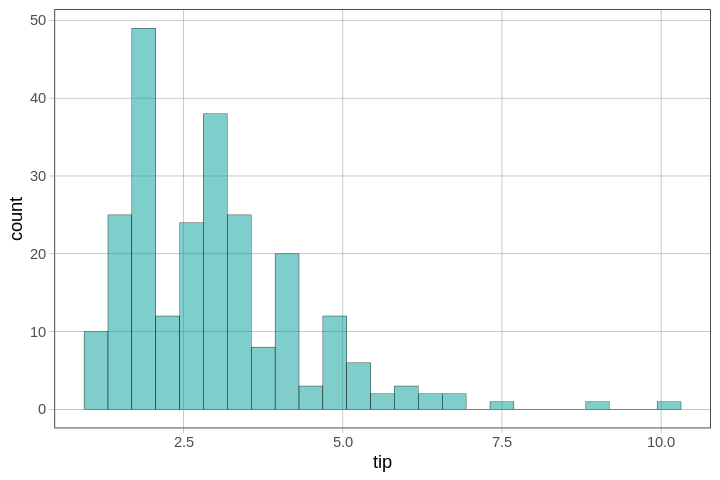

In [ ]:
## Run this code but do not edit it
# Create histogram for tip
gf_histogram(~tip, data = dat, fill = 'turquoise', color = 'black')

**Question 1.3 -** Describe the distribution of the tips in the data set.

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> The values in the tips column seem to have a tail to the right - right-skewed. Most of the tip amounts are between 1 and 5 dollars. There is an outlier tip amount of 10 dollars.
</div>

**Question 1.4 -** Find the mean of the `total_bill` column.

In [ ]:
## Sample response
mean(dat$total_bill)

[1] 19.78594

**Question 1.5 -** Plot the distribution of the `total_bill` column.

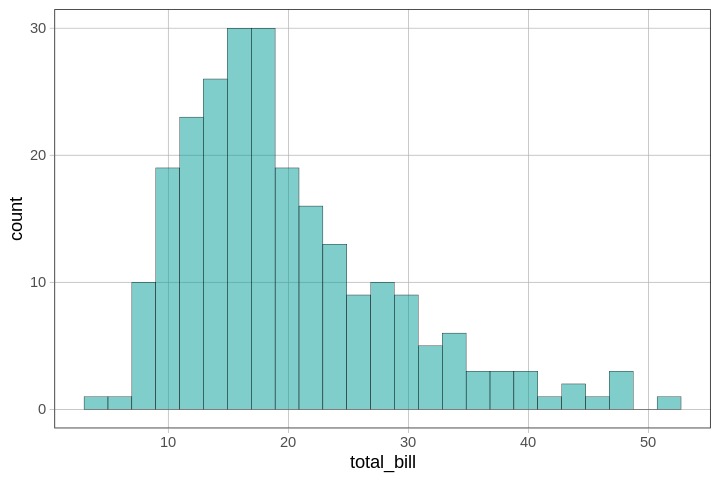

In [ ]:
## Run this code but do not edit it
# Create histogram for total bill
gf_histogram(~total_bill, data = dat, fill = 'turquoise', color = 'black')

**Question 1.6 -** Describe the distribution of the total bills in the data set.

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> The values in the total bill column seem to have a tail to the right - right-skewed. Most of the total bill amounts are between 10 and 25 dollars. There is an outlier total bill amount of over 50 dollars.
</div>

### 2.0 - Scatter Plots

When analyzing two numerical variables of interest, it's often helpful to calculate create a scatter plot to determine if there is a linear association.

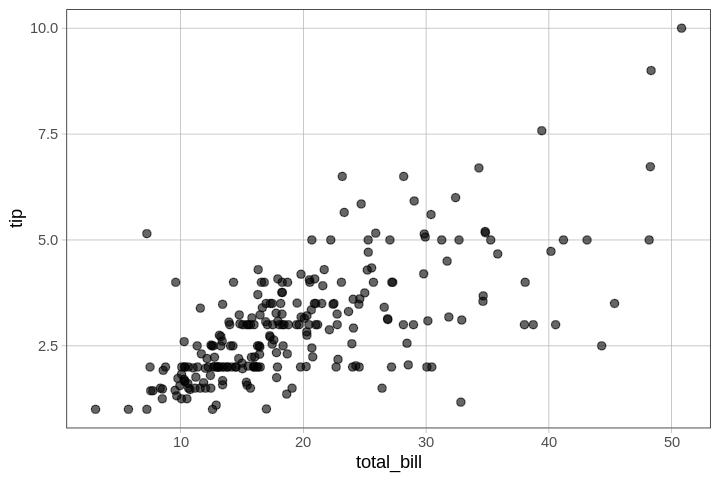

In [ ]:
## Run this code but do not edit it
# Create scatter plot for tip and total bill
gf_point(tip ~ total_bill, data = dat)

**Question 2.1 -** Analyze the scatter plot and describe the association betwee the total bill and tip amount.

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Instructor Note:</b> There seems to be a positive linear association bewteen the total bill and the tip amount. As the total bill increases the tip amount seems to increase.
</div>

We can add a line of best fit to our scatter plot using the `gf_lm` command. We use the `gf_point` command to produce the scatterplot, the `gf_lm` command to graph our loine of best fit, and a `%>%` symbol to put the elements together on the same graph:

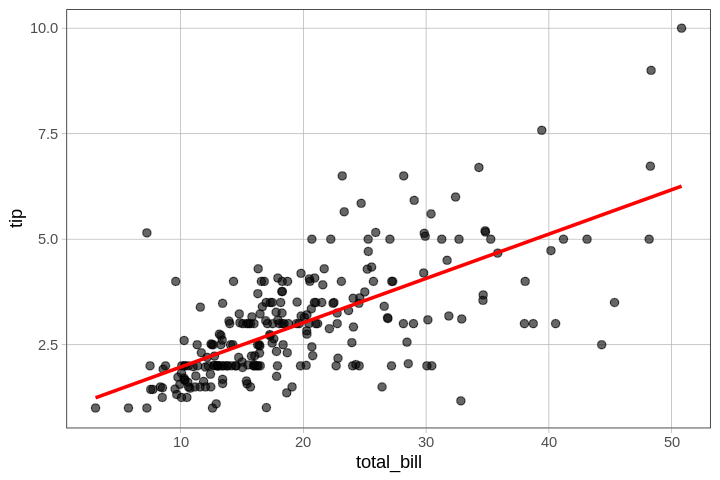

In [ ]:
## Run this code but do not edit it
# Create scatter plot for tip and total bill and add a line of best fit
gf_point(tip ~ total_bill, data = dat) %>% gf_lm(color = 'red')

**Question 2.2 -** Is the slope value of the line positive or negative? How can you tell?

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> The slope will be positive. In our line, as <code>total_bill</code> increases, <code>tip</code>also increases.
</div>

R can help us find the equation that models this line. We can model a linear trend between a predictor (x) and outcome (y) using standard units. First, we need to transform the data from the original units (dollars) to standard units (unitless). Since the variables `total_bill` and `tip` are columns/vectors in a dataframe we can access the values using dollar sign ($) notation. Then, we can perform arithmetic operations on each item/value in the column/vector.

Let's take it one step at a time. Before we start, we need to remind ourselves of the formula that is used to convert values into standard units:

$$\text{standard unit}=\displaystyle \frac{\text{value}-\text{mean of the values}}{\text{standard deviation of the values}}$$

First we will get the mean and the standard deviation of the `total_bill` column and the `tip` column.

**Note:** The command to find the standard deviation is `sd`.

In [ ]:
## Run this code but do not edit it
# Find the mean and standard deviation of total_bill
mean_total_bill <- mean(dat$total_bill)
sd_total_bill <- sd(dat$total_bill)

# The print command will display text and the value of variables to the screen
# The paste command takes multiple elements as inputs and combines together
print(paste("The mean of the total bill column is", mean_total_bill))
print(paste("The standard deviation of the total bill column is", sd_total_bill))


[1] "The mean of the total bill column is 19.7859426229508"
[1] "The standard deviation of the total bill column is 8.90241195485686"


Now that we have the mean and the standard deviation saved to the variable names `mean_total_bill` and `sd_total_bill` we can use them to convert all the total bill values into standard units. Now, we subtract the mean from each value.

In [ ]:
## Run this code but do not edit it
# Subtract the mean from each total_bill
dat$total_bill - mean_total_bill

[1]  -2.79594262  -9.44594262   1.22405738   3.89405738   4.80405738
  [6]   5.50405738 -11.01594262   7.09405738  -4.74594262  -5.00594262
 [11]  -9.51594262  15.47405738  -4.36594262  -1.35594262  -4.95594262
 [16]   1.79405738  -9.45594262  -3.49594262  -2.81594262   0.86405738
 [21]  -1.86594262   0.50405738  -4.01594262  19.63405738   0.03405738
 [26]  -1.97594262  -6.41594262  -7.09594262   1.91405738  -0.13594262
 [31] -10.23594262  -1.43594262  -4.72594262   0.90405738  -2.00594262
 [36]   4.27405738  -3.47594262  -2.85594262  -1.09594262  11.48405738
 [41]  -3.74594262  -2.32594262  -5.84594262 -10.10594262  10.61405738
 [46]  -1.49594262   2.44405738  12.61405738   8.76405738  -1.74594262
 [51]  -7.24594262  -9.49594262  15.02405738  -9.84594262   5.77405738
 [56]  -0.29594262  18.22405738   6.62405738  -8.54594262  28.48405738
 [61]   0.50405738  -5.97594262  -8.76594262  -1.49594262  -2.19594262
 [66]   0.29405738  -3.33594262 -16.71594262   0.44405738  -4.77594262
 [71]  -7.76594262  -2.71594262   7.07405738   5.49405738  -5.05594262
 [76]  -9.27594262  -1.86594262   7.41405738   2.97405738  -2.49594262
 [81]  -0.34594262  -3.12594262  -9.71594262  12.89405738  -3.80594262
 [86]  15.04405738  -6.75594262  -1.50594262   4.92405738   1.37405738
 [91]   9.18405738   2.70405738 -14.03594262  -3.46594262   2.96405738
 [96]  20.38405738   7.49405738  -7.75594262   1.22405738  -7.32594262
[101]  -8.43594262  -4.40594262  24.51405738   2.63405738   1.13405738
[106]  -4.42594262   0.70405738   5.42405738  -1.54594262  -5.47594262
[111]  -5.78594262 -12.53594262  18.28405738   4.16405738   5.92405738
[116]  -2.47594262  10.14405738  -9.13594262  -7.35594262   4.29405738
[121]  -8.09594262  -6.36594262  -5.52594262  -3.83594262  -7.30594262
[126]  10.01405738 -11.26594262  -5.26594262  -8.40594262   3.03405738
[131]  -0.70594262   0.48405738  -8.61594262  -7.52594262  -1.52594262
[136] -11.27594262  -9.45594262  -5.63594262  -3.78594262  -6.62594262
[141]  -2.31594262  14.51405738  21.40405738   7.26405738  -3.35594262
[146] -11.43594262  -1.14594262  -7.91594262 -10.00594262 -12.27594262
[151]  -5.71594262  -6.65594262  -2.52594262   4.76405738  -0.01594262
[156]  10.06405738  28.38405738   5.21405738  -6.39594262  -3.29594262
[161]   1.71405738  -7.12594262  -3.57594262  -5.97594262  -2.27594262
[166]   4.73405738   0.97405738  11.92405738  -9.19594262  -9.15594262
[171]  31.02405738  -3.97594262 -12.53594262  12.06405738  -2.96594262
[176]  13.11405738  -1.89594262  -5.30594262 -10.18594262  14.84405738
[181]  14.86405738   3.54405738  25.56405738   3.38405738  20.76405738
[186]   0.90405738   1.11405738  10.67405738  -1.63594262   3.31405738
[191]  -4.09594262   0.02405738   8.65405738  -4.30594262  -3.20594262
[196] -12.22594262  -9.44594262  23.32405738  -6.78594262  -6.27594262
[201]  -1.07594262  -7.04594262  -6.78594262  -3.38594262   0.74405738
[206]  -3.31594262   6.80405738  18.94405738   4.48405738  -7.02594262
[211]  10.27405738   6.10405738  28.54405738  -6.51594262   8.38405738
[216]  -6.88594262   8.36405738  -8.19594262 -12.04594262  10.35405738
[221]  -7.62594262  -6.36594262 -11.20594262  -3.80594262  -6.36594262
[226]  -3.51594262  -9.69594262   0.66405738  -6.50594262   2.33405738
[231]   4.22405738  -4.09594262  -8.17594262  -9.01594262  -4.25594262
[236]  -9.71594262  -7.18594262  13.04405738  16.04405738   9.24405738
[241]   7.39405738   2.88405738  -1.96594262  -1.00594262

Finally, we can divide each result by the standard deviation.

**Note:** We need to use parenthesis to preserve the order of operations.

In [ ]:
## Run this code but do not edit it
# Subtract the mean from each total_bill and divide each by the standard deivation
(dat$total_bill - mean_total_bill)/sd_total_bill

[1] -0.314065743 -1.061054315  0.137497274  0.437415994  0.539635483
  [6]  0.618265859 -1.237411016  0.796869142 -0.533107505 -0.562313073
 [11] -1.068917353  1.738187073 -0.490422443 -0.152311826 -0.556696618
 [16]  0.201524866 -1.062177607 -0.392696119 -0.316312325  0.097058795
 [21] -0.209599672  0.056620316 -0.451107255  2.205476165  0.003825635
 [26] -0.221955874 -0.720697116 -0.797080910  0.215004359 -0.015270314
 [31] -1.149794311 -0.161298155 -0.530860923  0.101551959 -0.225325747
 [36]  0.480101056 -0.390449537 -0.320805489 -0.123106258  1.289993929
 [41] -0.420778396 -0.261271062 -0.656669524 -1.135191527  1.192267605
 [46] -0.168037901  0.274538787  1.416925822  0.984458754 -0.196120179
 [51] -0.813930276 -1.066670771  1.687638974 -1.105985959  0.648594719
 [56] -0.033242971  2.047092122  0.744074461 -0.959958118  3.199588777
 [61]  0.056620316 -0.671272308 -0.984670522 -0.168037901 -0.246668278
 [66]  0.033031203 -0.374723461 -1.877686936  0.049880569 -0.536477378
 [71] -0.872341413 -0.305079414  0.794622560  0.617142568 -0.567929528
 [76] -1.041958367 -0.209599672  0.832814457  0.334073214 -0.280367010
 [81] -0.038859426 -0.351134349 -1.091383175  1.448377972 -0.427518143
 [86]  1.689885556 -0.758889013 -0.169161193  0.553114976  0.154346640
 [91]  1.031636979  0.303744355 -1.576644924 -0.389326246  0.332949923
 [96]  2.289722996  0.841800786 -0.871218122  0.137497274 -0.822916605
[101] -0.947601916 -0.494915608  2.753642215  0.295881317  0.127387654
[106] -0.497162190  0.079086138  0.609279531 -0.173654357 -0.615107754
[111] -0.649929778 -1.408151261  2.053831868  0.467744854  0.665444085
[116] -0.278120428  1.139472924 -1.026232292 -0.826286478  0.482347638
[121] -0.909410019 -0.715080661 -0.620724209 -0.430888016 -0.820670023
[126]  1.124870139 -1.265493293 -0.591518641 -0.944232042  0.340812961
[131] -0.079297906  0.054373734 -0.967821155 -0.845382427 -0.171407775
[136] -1.266616584 -1.062177607 -0.633080411 -0.425271560 -0.744286229
[141] -0.260147771  1.630351129  2.404298687  0.815965091 -0.376970044
[146] -1.284589242 -0.128722713 -0.889190779 -1.123958616 -1.378945693
[151] -0.642066740 -0.747656102 -0.283736883  0.535142319 -0.001790821
[156]  1.130486595  3.188355866  0.585690418 -0.718450534 -0.370230297
[161]  0.192538537 -0.800450783 -0.401682448 -0.671272308 -0.255654606
[166]  0.531772446  0.109414997  1.339418737 -1.032972038 -1.028478874
[171]  3.484904713 -0.446614091 -1.408151261  1.355144812 -0.333161691
[176]  1.473090376 -0.212969545 -0.596011806 -1.144177856  1.667419734
[181]  1.669666317  0.398100806  2.871587779  0.380128149  2.332408058
[186]  0.101551959  0.125141072  1.199007351 -0.183763977  0.372265111
[191] -0.460093584  0.002702344  0.972102552 -0.483682697 -0.360120677
[196] -1.373329238 -1.061054315  2.619970576 -0.762258886 -0.704971041
[201] -0.120859676 -0.791464455 -0.762258886 -0.380339917  0.083579302
[206] -0.372476879  0.764293701  2.127969080  0.503690168 -0.789217872
[211]  1.154075708  0.685663325  3.206328523 -0.731930027  0.941773692
[216] -0.773491797  0.939527110 -0.920642930 -1.353109998  1.163062036
[221] -0.856615338 -0.715080661 -1.258753547 -0.427518143 -0.715080661
[226] -0.394942701 -1.089136593  0.074592973 -0.730806736  0.262182585
[231]  0.474484600 -0.460093584 -0.918396347 -1.012752799 -0.478066241
[236] -1.091383175 -0.807190530  1.465227339  1.802214665  1.038376726
[241]  0.830567875  0.323963595 -0.220832583 -0.112996638

Now we can add these values as a new column to the `dat` dataframe by assigning the result of our operations to a new column named `su_total_bill`. The syntax (rules that control a programming language) is

```
<dataframe name>['<new column name'] <- <operation>
```

In [ ]:
## Run this code but do not edit it
# Add the column su_total_bill to the dat dataframe
dat['su_total_bill'] <- (dat$total_bill - mean_total_bill)/sd_total_bill

# Display the first 6 observations in the dat dataframe
head(dat)

,total_bill,tip,tip_percent,smoker,day,time,size,su_total_bill
,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,16.99,1.01,6,No,Sun,Dinner,2,-0.3140657
2,10.34,1.66,16,No,Sun,Dinner,3,-1.0610543
3,21.01,3.50,17,No,Sun,Dinner,3,0.1374973
4,23.68,3.31,14,No,Sun,Dinner,2,0.4374160
5,24.59,3.61,15,No,Sun,Dinner,4,0.5396355
6,25.29,4.71,19,No,Sun,Dinner,4,0.6182659


**Question 2.3 -** What do you think the value is for the mean of the `su_total_bill` column?

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> The mean should be zero because the values have been changed into standard units.
</div>

Let's check the value of the mean for `su_total_bill`.

**Note:** In the code cell below we round the mean to the nearest whole number.

In [ ]:
## Run this code but do not edit it
# Calculate the mean of the su_total_bill column
round(mean(dat$su_total_bill))

[1] 0

As you can see, you can use R just like a calculator. Addition, subtraction, multiplication, division ... it's all there. We don't have to perform each step in a separate cell, we can do it all in one.

**Question 2.4 -** Add a column to the `dat` dataframe that contains the tip amount in standard units.

In [ ]:
## Sample response
# Find the mean and standard deviation of total_bill
mean_tip <- mean(dat$tip)
sd_tip <- sd(dat$tip)

# Subtract the mean from each total_bill and divide each by the standard deivation
# Add the column su_total_bill to the dat dataframe
dat['su_tip'] <- (dat$tip - mean_tip)/sd_tip

# Display the first 6 observations in the dat dataframe
head(dat)

,total_bill,tip,tip_percent,smoker,day,time,size,su_total_bill,su_tip
,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,16.99,1.01,6,No,Sun,Dinner,2,-0.3140657,-1.4369932
2,10.34,1.66,16,No,Sun,Dinner,3,-1.0610543,-0.9672172
3,21.01,3.50,17,No,Sun,Dinner,3,0.1374973,0.3626102
4,23.68,3.31,14,No,Sun,Dinner,2,0.4374160,0.2252911
5,24.59,3.61,15,No,Sun,Dinner,4,0.5396355,0.4421107
6,25.29,4.71,19,No,Sun,Dinner,4,0.6182659,1.2371163


Now we can the scatter plot for total bil and tip in standard units.

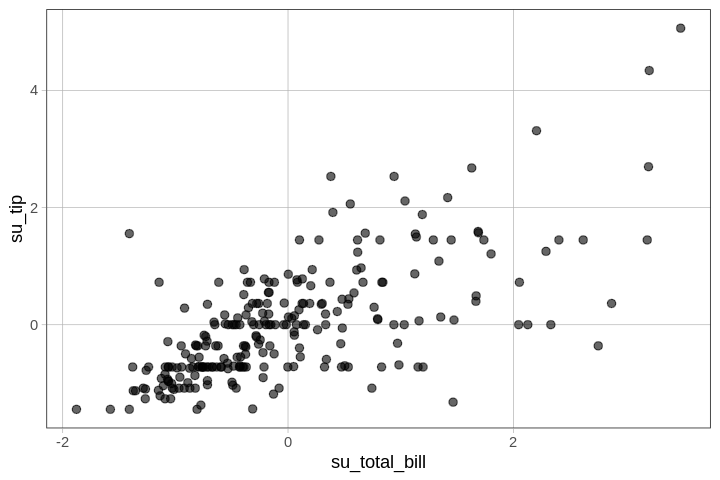

In [ ]:
## Run this code but do not edit it
# Create scatter plot for tip and total bill and add a line of best fit
gf_point(su_tip ~ su_total_bill, data = dat)

We can also add the line of best fit.

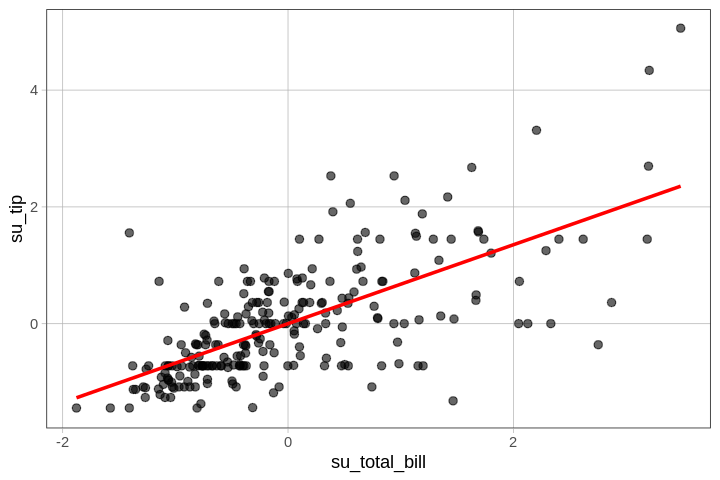

In [ ]:
## Run this code but do not edit it
# Create scatter plot for tip and total bill and add a line of best fit
gf_point(su_tip ~ su_total_bill, data = dat) %>% gf_lm(color = 'red')

**Question 2.5 -** What is the $y-$intercept for the line of best fit?

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Instructor Note:</b> The y-intercept for the line is the 0, the origin.
</div>

**Question 2.6 -** What do you thinlk the slope of the line represents?

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Instructor Note:</b> The slope of the line is the correlation coefficient r. It describes the strength of the linear association between the total bill and the tip.
</div>

### 3.0 - Finding the Correlation Coefficient $(r)$

Now that we have our variables of interest in standard units, we can quantify how tightly they are gathered around the line of best fit by calculating the value of $r$. To calculate the value of $r$ we:

take the average of the products of the two variables, when both variables are measured in standard units.

In other words, we multiply each value in `su_total_bil` times each value in `su_tips`, add all of them together then divide by the total number of data points.

Fortunatley for us, this can be implemented using a few lines of R code. Again, we'll take it one step at a time. First we'll calculate the product between each value in `su_total_bil` times each value in `su_tips`.

In [ ]:
## Run this code but do not edit it
# Calculate the product of each value in `su_total_bil` times each value in `su_tips`
dat$su_total_bil * dat$su_tip

[1]  4.513103e-01  1.026270e+00  4.985791e-02  9.854591e-02  2.385786e-01
  [6]  7.648668e-01  8.927775e-01  7.010211e-02  4.000426e-01 -9.417196e-02
 [11]  9.952482e-01  2.514650e+00  5.062450e-01 -1.894831e-04 -8.739409e-03
 [16]  1.342474e-01  1.019680e+00 -2.019966e-01 -1.146981e-01  2.467238e-02
 [21] -1.638640e-01 -1.015989e-02  2.504817e-01  7.303121e+00  5.024430e-04
 [26]  1.055976e-01  5.199745e-01  5.750845e-01  2.022752e-01 -1.899699e-05
 [31]  1.286609e+00  5.808703e-02 -6.604161e-04 -4.024085e-02 -4.424987e-02
 [36]  2.087880e-01  2.817048e-01 -1.662905e-02  6.123813e-02  1.866245e+00
 [41]  2.306002e-01  8.653632e-02 -2.929270e-02  1.376926e+00  2.241878e+00
 [46] -2.090471e-04  3.971776e-01  3.073937e+00 -6.747004e-01 -2.439828e-04
 [51]  2.931143e-01  3.070400e-01  2.685464e+00  1.149662e+00  6.289457e-01
 [56] -1.229450e-02  2.546680e-03 -8.057243e-01  8.591088e-01  8.629405e+00
 [61]  8.663918e-03  4.843151e-01  7.246613e-01 -9.250832e-02  6.387218e-02
 [66]  3.622000e-03  1.430709e-01  2.711794e+00 -3.562774e-02  3.521665e-01
 [71]  6.482982e-01 -3.795332e-04  8.139046e-02  8.928255e-01  3.276623e-01
 [76]  1.316553e+00 -1.237951e-02  6.029380e-01  4.156029e-04  5.841399e-02
 [81] -4.834297e-05 -1.019473e-01  9.215124e-01  2.095381e+00  2.991799e-01
 [86]  2.652399e+00  5.475295e-01 -1.224687e-01  1.139987e+00  1.920145e-04
 [91]  1.283405e-03  1.101408e-01  2.277023e+00 -3.662766e-01  6.057262e-02
 [96]  2.865751e+00  6.094439e-01  9.434024e-01  1.710531e-04  8.910989e-01
[101]  3.412524e-01 -6.156985e-04 -9.916474e-01  1.030127e-01  9.959102e-02
[106]  4.880501e-01  6.068598e-02  5.688043e-01 -9.560030e-02 -4.453235e-01
[111] -8.085434e-04  2.033681e+00  1.486926e+00 -1.515425e-01  4.817658e-01
[116] -1.008493e-01  1.706133e+00  1.111260e+00  7.155928e-01 -2.728859e-02
[121]  4.523780e-01  6.813021e-01  2.235365e-01  3.108806e-01  2.836789e-01
[126]  9.769754e-01  1.388637e+00  4.267737e-01  6.812523e-01 -2.015556e-01
[131]  8.586809e-02 -6.612958e-03  1.048009e+00  6.099335e-01 -3.118372e-02
[136]  1.600418e+00  7.663487e-01  4.567601e-01  3.068284e-01  1.335540e-01
[141] -9.433223e-02  4.361766e+00  3.478320e+00  1.180464e+00  1.902449e-01
[146]  1.391023e+00  1.524124e-01  8.793200e-01  1.030250e+00  9.948931e-01
[151]  2.312224e-01  5.394251e-01  5.296413e-02 -3.860989e-01  1.292056e-03
[156]  1.749870e+00  4.612622e+00  3.182017e-01  2.016127e-01  2.671168e-01
[161]  6.981644e-02  2.882600e-01  2.898092e-01  4.843151e-01 -3.180464e-04
[166]  1.851395e-01 -5.996297e-02  1.453728e+00  1.036436e+00  7.420354e-01
[171]  1.763491e+01 -5.220080e-02 -2.189842e+00  1.779791e-01 -2.412012e-01
[176]  1.189441e-01  1.536550e-01  4.300155e-01 -8.283577e-01  6.648783e-01
[181]  8.226479e-01  7.629541e-01  1.041267e+00  9.620310e-01  2.901626e-03
[186]  1.469161e-01  4.537743e-02 -8.650697e-01 -6.663469e-02  2.695111e-01
[191]  4.982144e-01  2.327516e-03 -3.079214e-01  3.419799e-01 -2.607188e-01
[196]  1.546669e+00  7.655382e-01  3.790334e+00  5.499608e-01  5.086283e-01
[201] -8.749955e-02  5.653121e-01  5.499608e-01  1.369688e-01  6.050944e-02
[206] -6.237962e-02  2.274265e-01  2.647294e-03 -3.524855e-01  4.382210e-01
[211] -8.326521e-01  1.071243e+00  1.390789e+01  2.635842e-01  2.383448e+00
[216]  1.061190e+00  1.168816e-03  9.969222e-01  1.523897e+00  7.709933e-02
[221]  4.942172e-01 -2.489593e-01  9.809552e-01 -5.318528e-04  7.329833e-01
[226]  1.422276e-01  7.857992e-01  9.279719e-05  1.469806e-01 -2.241237e-02
[231] -3.423351e-01 -5.723782e-04 -2.600069e-01  1.118622e+00 -5.947371e-04
[236]  1.379004e+00  1.165761e+00 -1.936087e+00  2.177448e+00  2.192659e+00
[241] -5.992450e-01 -2.337359e-01  1.992288e-01 -1.405732e-04

Now we can find the average.

In [ ]:
## Run this code but do not edit it
# Find the average of the sum of product of each value in `su_total_bil` times each value in `su_tips`
mean(dat$su_total_bil * dat$su_tip)

[1] 0.6729647

**Question 3.1 -** Does the value of $r$ confirm what you saw in the scatter plot? Explain.


**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> The value of 0.67 confirms what is in the scatter plot. The value of 0.67 is a relatively strong positive linear association. The slope of the line is positive and the scatter plot has a positive linear association.
</div>

Correlation only measures association. Correlation does not imply causation. Though the correlation between the tip and the total bill is positive, that does not mean that having a high total bill **causes** a person to leave a large tip. Other factors, such as time of day, day of the week, and size of the group are confounding variables - meaning that they may affect the other variables in a way that produces distorted associations between two total bill and tip.

Also, as we observed in the previous lesson outliers can have a big effect on correlation. We looked at the tip amount, thus the \$10 tip can be considered an outlier. It may be better to use the tip percent as the outcome due to the fact that most people tend to tip a percentage based on the amount of the total bill.

The correlation coefficient doesn’t just measure how clustered the points in a scatter plot are about a straight line. It also helps identify the straight line about which the points are clustered. The process of finding the equation of this line is called linear regression. In statistics, linear regression is a linear approach for modelling the relationship between an outcome and one or more predictive variables (also known as dependent and independent variables). The case of one predictive variable is called simple linear regression where we use the value of one variable (which we will call $x$) to predict the value of another (which we will call
$y$). When the variables $x$ and $y$ are measured in standard units, the regression line for predicting $y$ is based on $x$ and has slope $r$ and passes through the origin. Thus the equation of the regression line can be written as: estimate for $y=r \cdot x$. More formally we say $\hat y$ (pronounced y hat), where $\hat y =r \cdot x$.

**Question 3.2 -** Write the equation of the regression line.

**Double-click this cell to type your answer here:**

<div class="alert alert-block alert-info"><b>Sample Response:</b> y_hat=0.67x
</div>

The correlation coefficient in standard units not only helped us quantify the strength of the linear association between total bill and tip, it also helped us write the equation of the regression line. Next, we want to be able to use our equation to make predictions and make statements about the association within the context of the data. In order to do this, we'll need to transform our regression equation from standard units back to the original units of the data.